### 01 - exploración

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

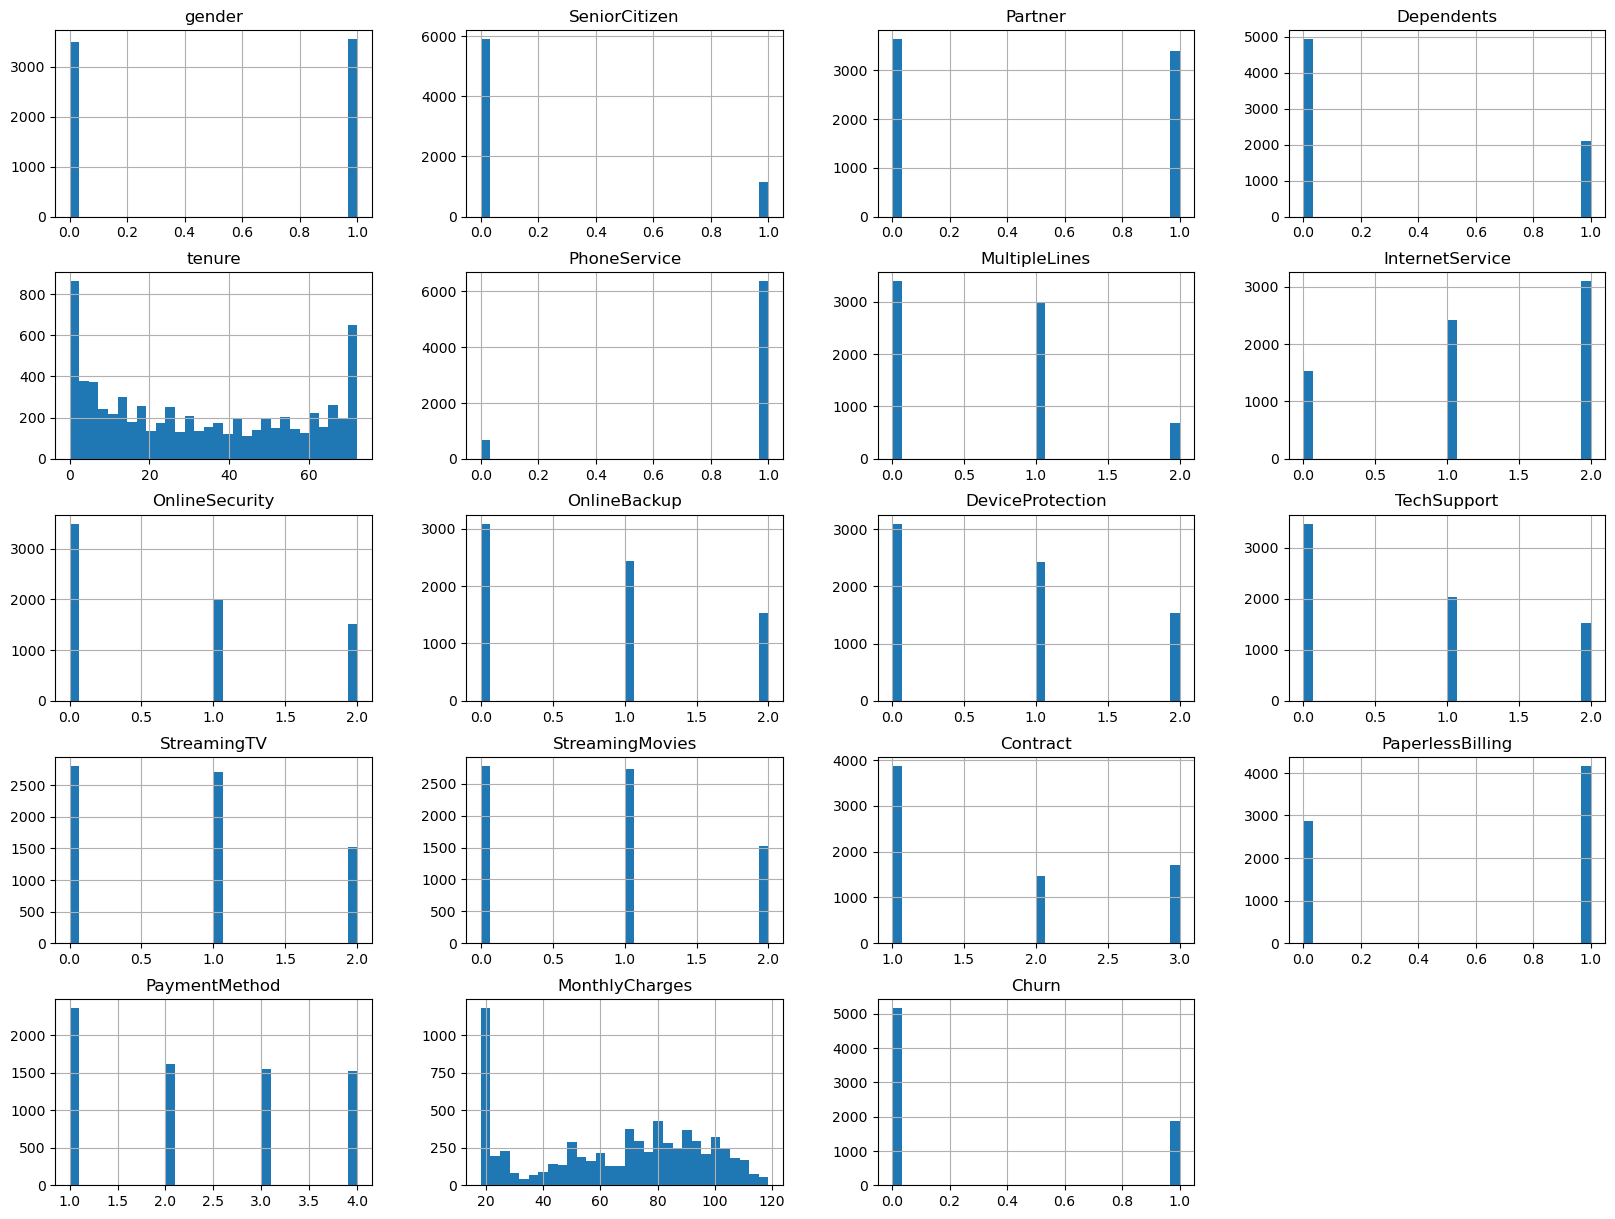

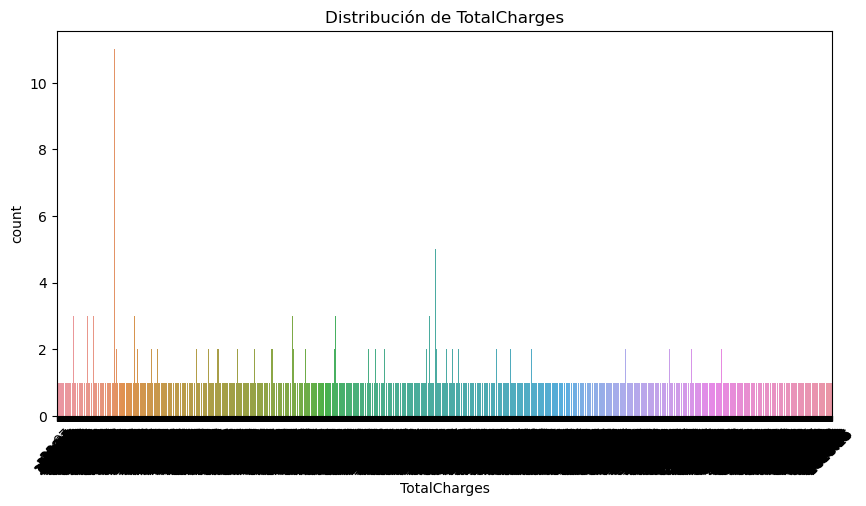

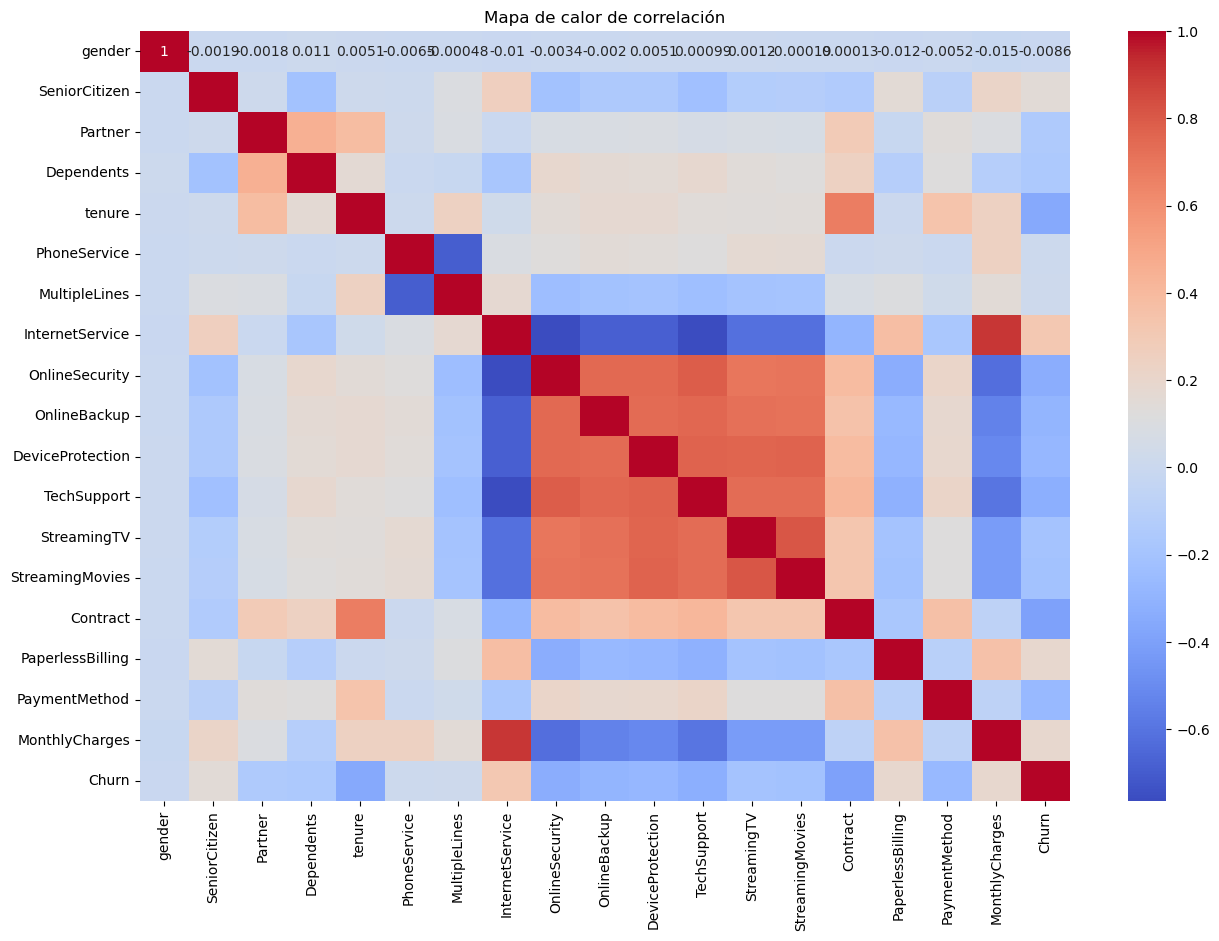

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = 'Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print(df.head())

# Descripción general de las variables
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Reemplazar valores categóricos por valores numéricos
categorical_mappings = {
    'Yes': 1,
    'No': 0,
    'No internet service': 2,
    'No phone service': 2,
    'Male': 1,
    'Female': 0,
    'Electronic check': 1,
    'Mailed check': 2,
    'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 4,
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3,
    'DSL': 1,
    'Fiber optic': 2,
    'No': 0  
}

# Aplicar mapeo a las columnas correspondientes
df.replace(categorical_mappings, inplace=True)

# Visualización de la distribución de variables numéricas
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Visualización de la distribución de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'customerID':  # Excluir la columna 'customerID'
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col)
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45)
        plt.show()

# Correlación entre variables numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

### 02 - preprocesado

In [4]:
import pandas as pd

# Cargar el dataset
file_path = 'Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Eliminar columnas irrelevantes o duplicadas
df.drop(columns=['customerID', 'gender'], inplace=True)

# Explorar la cantidad de datos nulos por columna
total_datos_nulos = df.isnull().sum()
datos_nulos_df = pd.DataFrame({'Columna': total_datos_nulos.index, 'Datos Nulos': total_datos_nulos.values})
print("Datos Nulos por Columna:")
print(datos_nulos_df)

Datos Nulos por Columna:
             Columna  Datos Nulos
0      SeniorCitizen            0
1            Partner            0
2         Dependents            0
3             tenure            0
4       PhoneService            0
5      MultipleLines            0
6    InternetService            0
7     OnlineSecurity            0
8       OnlineBackup            0
9   DeviceProtection            0
10       TechSupport            0
11       StreamingTV            0
12   StreamingMovies            0
13          Contract            0
14  PaperlessBilling            0
15     PaymentMethod            0
16    MonthlyCharges            0
17      TotalCharges            0
18             Churn            0


#### Calculo de hiperparamtros

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
file_path = 'Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Eliminar columnas irrelevantes o duplicadas
df.drop(columns=['customerID', 'gender'], inplace=True)

# Convertir variables categóricas a numéricas
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar características y etiquetas
X = df.drop(columns=['Churn'])
y = df['Churn']

# Algoritmo 1: Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X, y)
print("Mejores hiperparámetros para Random Forest:")
print(grid_search_rf.best_params_)

# Algoritmo 2: Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}
gb_model = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(gb_model, param_grid=gb_param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X, y)
print("Mejores hiperparámetros para Gradient Boosting:")
print(grid_search_gb.best_params_)

Mejores hiperparámetros para Random Forest:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Mejores hiperparámetros para Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


### 03 - modelo 1 RandomForest

Precisión del modelo de Random Forest: 0.8126330731014905


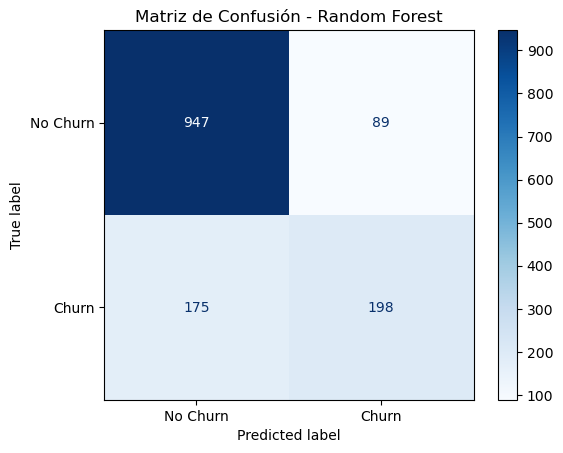

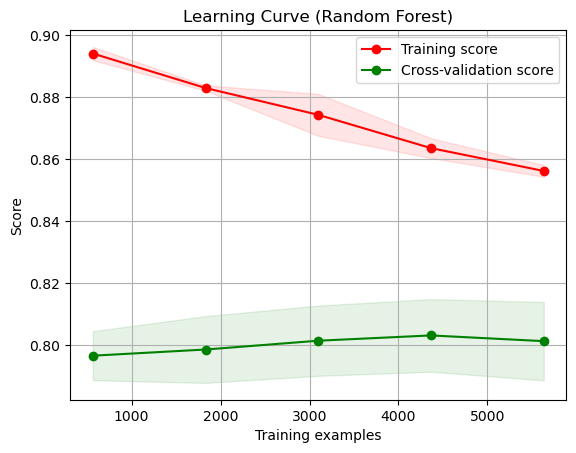

Informe de clasificación del modelo de Random Forest:
              precision    recall  f1-score   support

    No Churn       0.84      0.91      0.88      1036
       Churn       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Cargar el dataset
file_path = 'Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Eliminar columnas irrelevantes o duplicadas
df.drop(columns=['customerID', 'gender'], inplace=True)

# Reemplazar valores de cadena vacíos con 'Unknown'
df.replace(' ', 'Unknown', inplace=True)

# Convertir variables categóricas a numéricas
categorical_mappings = {
    'Yes': 1,
    'No': 0,
    'No internet service': 2,
    'No phone service': 2,
    'Electronic check': 1,
    'Mailed check': 2,
    'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 4,
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3,
    'DSL': 1,
    'Fiber optic': 2,
    'Unknown': -1
}

df.replace(categorical_mappings, inplace=True)

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Separar características y etiquetas
X = df.drop(columns=['Churn'])
y = df['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo de Random Forest:", accuracy_rf)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Función para trazar la curva de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Realizar curvas de aprendizaje para Random Forest
plot_learning_curve(rf_model, "Learning Curve (Random Forest)", X, y, cv=5, n_jobs=-1)
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn'])
print("Informe de clasificación del modelo de Random Forest:")
print(report)

### 04 - modelo 2 GradientBoosting

Precisión del modelo de Gradient Boosting: 0.8112136266855926


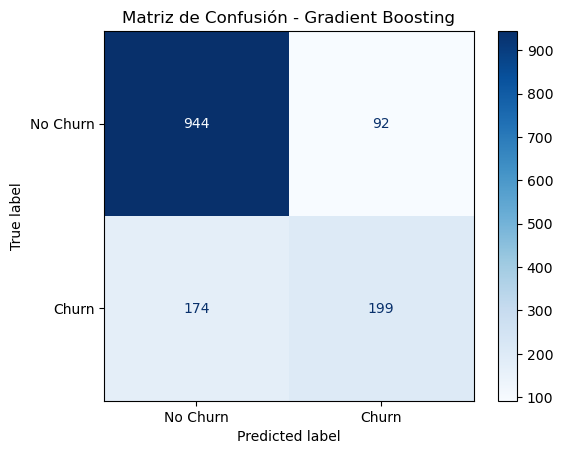

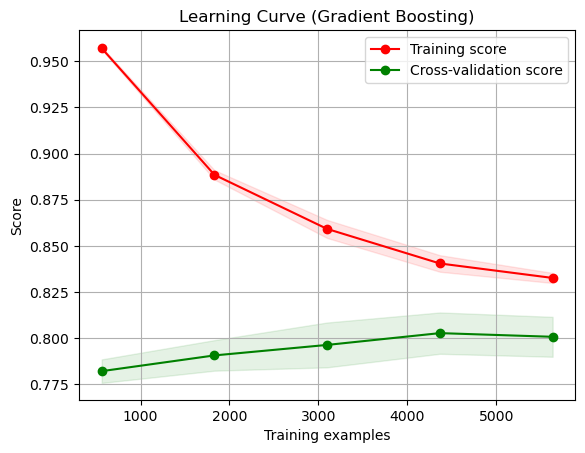

Informe de clasificación del modelo de Gradient Boosting:
              precision    recall  f1-score   support

    No Churn       0.84      0.91      0.88      1036
       Churn       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [7]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Cargar el dataset
file_path = 'Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Eliminar columnas irrelevantes o duplicadas
df.drop(columns=['customerID', 'gender'], inplace=True)

# Reemplazar valores de cadena vacíos con 'Unknown'
df.replace(' ', 'Unknown', inplace=True)

# Convertir variables categóricas a numéricas
categorical_mappings = {
    'Yes': 1,
    'No': 0,
    'No internet service': 2,
    'No phone service': 2,
    'Electronic check': 1,
    'Mailed check': 2,
    'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 4,
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3,
    'DSL': 1,
    'Fiber optic': 2,
    'Unknown': -1
}

df.replace(categorical_mappings, inplace=True)

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Separar características y etiquetas
X = df.drop(columns=['Churn'])
y = df['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Precisión del modelo de Gradient Boosting:", accuracy_gb)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Gradient Boosting")
plt.show()

# Función para trazar la curva de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Realizar curvas de aprendizaje para Gradient Boosting
plot_learning_curve(gb_model, "Learning Curve (Gradient Boosting)", X, y, cv=5, n_jobs=2)
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred_gb, target_names=['No Churn', 'Churn'])
print("Informe de clasificación del modelo de Gradient Boosting:")
print(report)

### 05 - Comparación

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score

# Cargar el dataset
file_path = 'Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Entrenar el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Realizar predicciones con ambos modelos
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Calcular el coeficiente Kappa de Cohen para evaluar la concordancia entre las predicciones de ambos modelos
kappa = cohen_kappa_score(y_pred_rf, y_pred_gb)
print("Coeficiente Kappa de Cohen:", kappa)

# Conclusión
if kappa >= 0.81:
    conclusion = "Concordancia casi perfecta"
elif 0.61 <= kappa <= 0.80:
    conclusion = "Concordancia sustancial"
elif 0.41 <= kappa <= 0.60:
    conclusion = "Concordancia moderada"
elif 0.21 <= kappa <= 0.40:
    conclusion = "Concordancia aceptable"
elif 0.01 <= kappa <= 0.20:
    conclusion = "Concordancia ligera"
else:
    conclusion = "Concordancia pobre"

print(f"El coeficiente Kappa de Cohen indica una {conclusion} entre los modelos de Random Forest y Gradient Boosting en sus predicciones.")

Coeficiente Kappa de Cohen: 0.9129397807738412
El coeficiente Kappa de Cohen indica una Concordancia casi perfecta entre los modelos de Random Forest y Gradient Boosting en sus predicciones.


### Codigo Predictor

In [ ]:
# Solicitar los datos del usuario
user_data = {}
for column in X.columns:
    # Para las columnas 'tenure', 'MonthlyCharges' y 'TotalCharges'
    if column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        user_input = input(f"Ingrese el valor numérico para '{column}': ")
        # Verificar si la entrada es un número
        if user_input.replace('.', '', 1).isdigit():
            # Convertir la entrada a un flotante
            user_data[column] = float(user_input)
        else:
            print("¡Entrada no válida! Por favor, ingrese un valor numérico válido.")
            continue
    else:
        # Definir las opciones disponibles para las otras columnas
        options = list(categorical_mappings.keys())
        options_str = ", ".join([f"{i + 1}: {option}" for i, option in enumerate(options)])
        prompt = f"Ingrese el valor para '{column}' ({options_str}): "

        # Solicitar al usuario que ingrese el valor
        user_input = input(prompt)
        
        # Verificar si la entrada es un número
        if user_input.isdigit():
            # Convertir la entrada a un entero
            user_input = int(user_input)
            
            # Verificar si la entrada está dentro del rango de opciones
            if user_input in range(1, len(options) + 1):
                # Asignar el valor correspondiente al índice ingresado por el usuario
                user_data[column] = options[user_input - 1]
            else:
                print("¡Opción no válida! Por favor, ingrese un número válido.")
                continue
        else:
            # Si no es un número, asumir que es un valor directo
            user_data[column] = user_input

# Crear un DataFrame con los datos del usuario
user_df = pd.DataFrame([user_data])

# Convertir valores de cadena a numéricos
user_df.replace(categorical_mappings, inplace=True)

# Realizar la predicción
prediction = gb_model.predict(user_df)

# Mostrar el resultado de la predicción
if prediction[0] == 0:
    print("El usuario NO cancelará el servicio (No Churn).")
else:
    print("El usuario cancelará el servicio (Churn).")